<h3> First Kaggle competition </h3>
Welcome to my repository for my first Kaggle competition, the Titanic! The Titanic disaster is one of history's most famous shipwrecks, and this competition allows me to put my machine learning skills to the test. In this challenge, I'll use the provided passenger data to create a predictive model that will predict who is most likely to survive the Titanic's sinking. To find the best solution, I'll explore various features and employ various algorithms. I'm looking forward to seeing what insights and lessons I can obtain from this experience. Keep an eye out for updates on my progress!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

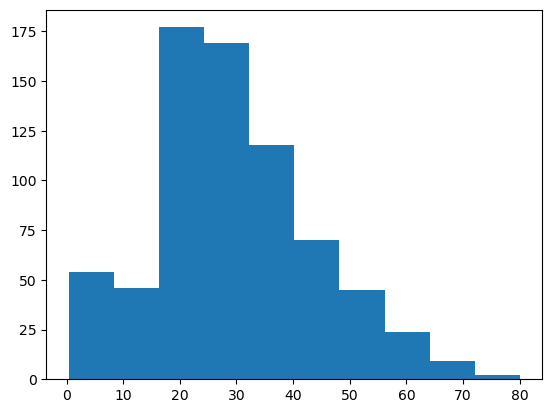

In [4]:
plt.hist(df["Age"])

In [5]:
surv = df[(df['Survived'] == 1)]

In [6]:
df['Sex'].replace('female', 0,inplace=True)
df['Sex'].replace('male', 1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.corr()["Survived"] # survive with sex, Pclass, Fare, Parch, SibSp.

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

<AxesSubplot:>

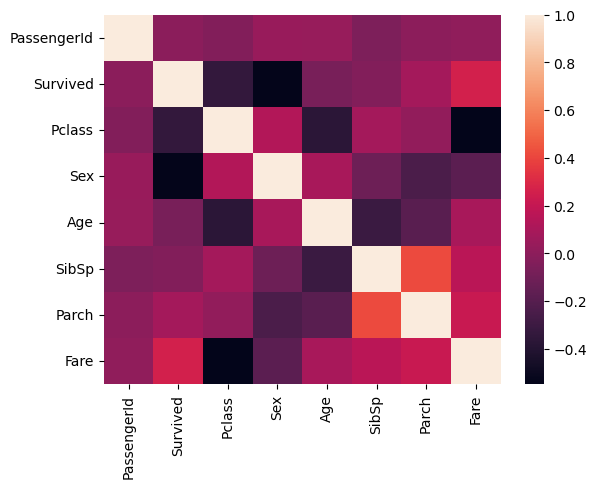

In [8]:
sns.heatmap(df.corr())

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
data = pd.DataFrame()

In [11]:
#data["PassengerId"] = df["PassengerId"]
data["Sex"] = df['Sex'] # survive with sex, Pclass, Fare, Parch, SibSp.
data["Pclass"] = df["Pclass"]
data["Fare"] = df["Fare"]
data["Parch"] = df["Parch"]
data["SibSp"] = df["SibSp"]
#data["Survived"] = df["Survived"]

In [12]:
data

,Sex,Pclass,Fare,Parch,SibSp
0,1,3,7.2500,0,1
1,0,1,71.2833,0,1
2,0,3,7.9250,0,0
3,0,1,53.1000,0,1
4,1,3,8.0500,0,0
...,...,...,...,...,...
886,1,2,13.0000,0,0
887,0,1,30.0000,0,0
888,0,3,23.4500,2,1
889,1,1,30.0000,0,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, df["Survived"], test_size = 0.33, random_state = 0)

In [14]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1])

In [15]:
accuracy_score(y_pred, y_test)

0.7898305084745763

In [16]:
confusion_matrix(y_pred, y_test)

array([[157,  35],
       [ 27,  76]])

In [17]:
data_test = pd.read_csv("/kaggle/input/titanic/test.csv")
kaggle_test = pd.DataFrame()
kaggle_test["Sex"] = data_test['Sex']
kaggle_test["Pclass"] = data_test["Pclass"]
kaggle_test["Fare"] = data_test["Fare"]
kaggle_test["Parch"] = data_test["Parch"]
kaggle_test["SibSp"] = data_test["SibSp"]
kaggle_test['Sex'].replace('female', 0,inplace=True)
kaggle_test['Sex'].replace('male', 1,inplace=True)
kaggle_test.fillna(X_train.mean(), inplace=True)

In [18]:
test_pred = log_reg.predict(kaggle_test)

In [19]:
final = pd.DataFrame()
final["PassengerId"] = data_test["PassengerId"]
final["Survived"] = test_pred
final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [20]:
final.to_csv("final.csv", index=False)